In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# Load the data set

In [2]:
Data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/postoperative-patient-data/post-operative.data', header = None )
Data.head()

,0,1,2,3,4,5,6,7,8
0,mid,low,excellent,mid,stable,stable,stable,15,A
1,mid,high,excellent,high,stable,stable,stable,10,S
2,high,low,excellent,high,stable,stable,mod-stable,10,A
3,mid,low,good,high,stable,unstable,mod-stable,15,A
4,mid,mid,excellent,high,stable,stable,stable,10,A


# Preprocessing the data set

1. Assign names to the data columns so we know what each number or string represents
2. Data under the "COMFORT" column  was entered as an array of strings, so I replace the strings as numbers using the "to_numeric" function. In addition, replace all missing values (noted as '?') with 'NaN' ( Not A Number) so that it can be imputed 
3. There are excess spacings in the "ADM DECS" column, so I used the "replace" function to remove the excess spacings. This was necessary for proper relationship plotting of patient decisions classified as 'A'

In [3]:
Data.columns = ['L-CORE', 'L-SURF', 'L-O2', 'L-BP', 'SURF-STBL', 'CORE-STBL', 'BP-STBL', 'COMFORT', 'ADM-DECS']
Data['COMFORT'] = Data['COMFORT'].apply(pd.to_numeric, errors = 'coerce')
Data = Data.replace('A ', 'A')
Data

,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,ADM-DECS
0,mid,low,excellent,mid,stable,stable,stable,15.0,A
1,mid,high,excellent,high,stable,stable,stable,10.0,S
2,high,low,excellent,high,stable,stable,mod-stable,10.0,A
3,mid,low,good,high,stable,unstable,mod-stable,15.0,A
4,mid,mid,excellent,high,stable,stable,stable,10.0,A
5,high,low,good,mid,stable,stable,unstable,15.0,S
6,mid,low,excellent,high,stable,stable,mod-stable,5.0,S
7,high,mid,excellent,mid,unstable,unstable,stable,10.0,S
8,mid,high,good,mid,stable,stable,stable,10.0,S
9,mid,low,excellent,mid,unstable,stable,mod-stable,10.0,S


In [4]:
#Check how many nulls or missing data are in the data set
Data.isnull().sum()

L-CORE       0
L-SURF       0
L-O2         0
L-BP         0
SURF-STBL    0
CORE-STBL    0
BP-STBL      0
COMFORT      3
ADM-DECS     0
dtype: int64

# Preprocessing the data set (continued)
3.We can see there are 3 missing data under the "COMFORT" column. There are two options or methods to process these missing data

a. Delete the rows that contains the missing data. This is referred because there are only 3 rows that contains the data, so deleting them will not influence the data set too much. In addtion, these data sets will not even show up on the graphs vs "COMFORT" since they miss the values for "COMFORT"
  
or

b. replace the missing data with average values with the mean or median, assuming that it follows the general trend. This is a little controversial because each data row is independent of each other, and it is dangerous to assign the data set, which might influence of authenticity of the data. 
  
For the purpose of authenticity and originality, I chose option a: delete the rows that contains the missing data. 

In [5]:
Data = Data.replace('?', np.nan)
Data = Data.dropna()
Data

,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,ADM-DECS
0,mid,low,excellent,mid,stable,stable,stable,15.0,A
1,mid,high,excellent,high,stable,stable,stable,10.0,S
2,high,low,excellent,high,stable,stable,mod-stable,10.0,A
3,mid,low,good,high,stable,unstable,mod-stable,15.0,A
4,mid,mid,excellent,high,stable,stable,stable,10.0,A
5,high,low,good,mid,stable,stable,unstable,15.0,S
6,mid,low,excellent,high,stable,stable,mod-stable,5.0,S
7,high,mid,excellent,mid,unstable,unstable,stable,10.0,S
8,mid,high,good,mid,stable,stable,stable,10.0,S
9,mid,low,excellent,mid,unstable,stable,mod-stable,10.0,S


In [6]:
# double check to see if there are any nulls left 
Data.isnull().sum()

L-CORE       0
L-SURF       0
L-O2         0
L-BP         0
SURF-STBL    0
CORE-STBL    0
BP-STBL      0
COMFORT      0
ADM-DECS     0
dtype: int64

# Plot each category with "COMFORT" 

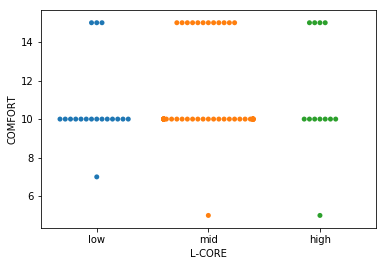

In [7]:
#L-Core vs COMFORT
sb.swarmplot(x='L-CORE', y='COMFORT', order=['low','mid','high'], data = Data)

L-CORE represents the patients' internal temperatures in Celcius. From the swarmplot, we can see there patients with "mid" or "low" internal temperatures are more lilely to rate high comfort than patients with "high" internal temperature. However, there is not much difference in comfort level when comparing patients with different internal temperatures.

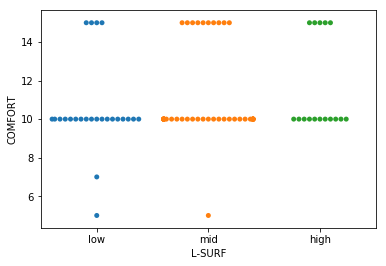

In [14]:
sb.swarmplot(x='L-SURF', y='COMFORT', order=['low','mid','high'], data=Data) # L-SURF VS COMFORT

L-SURF represents the patients' surface temperatures in Celcius. From the swarmplot, we can see there patients with "mid" or "low" surface temperatures are more lilely to rate high comfort than patients with "high" surface temperature. However, there is not much difference in comfort level when comparing patients with different surface

 temperatures.

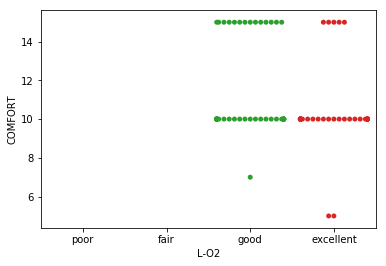

In [8]:
# L-O2 VS COMFORT
sb.swarmplot(x='L-O2', y='COMFORT', order=['poor','fair','good', 'excellent'], data=Data) 

L-O2 represents the oxygen saturation in %. From the swarmplot, we can tell that the comfort level is negatively correlated with the the oxygen saturation. Of those whose oxygen saturation was 'good' or 'excellent', more patients whose oxygen saturation was 'good' reported both high and middle comfort scores more frequently than those whose oxygen saturation was 'excellent'. 

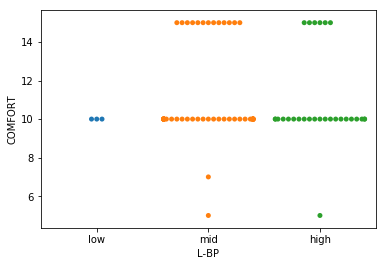

In [9]:
# L-BP VS COMFORT
sb.swarmplot(x='L-BP', y='COMFORT', order=['low','mid','high'], data= Data) 

L-BP represents the last measurement of blood pressure. From the swarmplot, we can tell that patients with mid blood presure are more likely to report high comfort level than patients with low or high bloor pressure. 

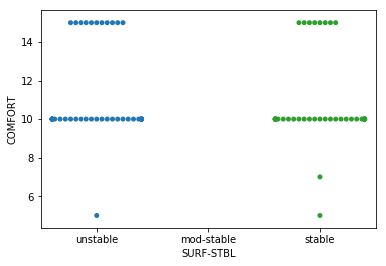

In [10]:
# SURF-STBL VS COMFORT
sb.swarmplot(x='SURF-STBL', y='COMFORT', order=['unstable','mod-stable', 'stable'],data= Data) 

Surf-STBL represents the stability of patient's surface temperature. There is a fairly large distribution of reported comfort levels of 10 between both patients that fall within the 'stable' and 'unstable' classifications for patient's surface temperature. There where no patients who fell within the 'mod-stable' classification. This data does not illustrate a significant relationship between comfort at discharge and the stability of patient's surface temperature.

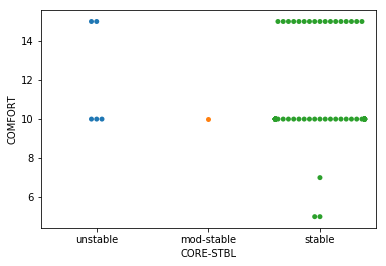

In [11]:
# CORE-STBL VS COMFORT
sb.swarmplot(x='CORE-STBL', y='COMFORT', order=['unstable','mod-stable','stable'], data= Data) 

CORE-STBL represents the stability of patient's core temperature. Patient comfort rating was evaluted here in relation to the stability of patient's surface temperature with three classifications: 'unstable', 'mod-stable', and 'stable'. There are no significant difference for patients with unstable or stable core temperature to choose higher comfort rating. 


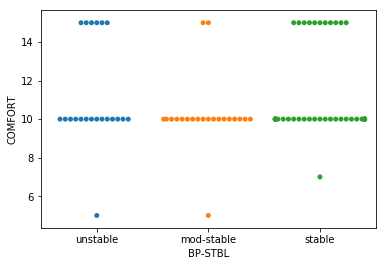

In [12]:
# BP-STBL VS COMFORT
sb.swarmplot(x='BP-STBL', y='COMFORT', order=['unstable','mod-stable','stable'], data= Data)

BP-STBL represents the stability of patient's blood pressure. Most of the data falls within the category of 'stable'. We can conclude that most patients with stable core temperature reported comfort levels of 10 or higher with significant number of patients indicating a comfort level of 15. Thus, this data does illustrate a significant relationship between patient's comfort at discharge and the stability of their core temperature. 

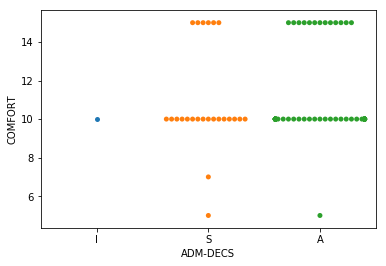

In [13]:
# DECISION ADM-DECS VS COMFORT
sb.swarmplot(x='ADM-DECS', y='COMFORT', order=['I', 'S', 'A'], data=Data)

ADM-DECS represents the discharge decisions. Patient comfort rating was evaluted here in relation to the discharge decision with three classifications: 'I', 'S', and 'A'.
I: the patient is sent to Intensive Care Unit
S: patient prepared to go home
A: patient sent to general hospital floor
The distribution of data falls largely within the 'S' and 'A' categories with the 'A' cagetorgy of patients containing the greatest frequency of comfort levels at or above 10. Given the greater frequency of favorable comfort levels within the 'A' classification, it would seem that patients experienced greater comfort when sent to general hospital floor. This data illustrates that there is a relationship between patients discharge location and their experienced comfort with a greater chance of higher comfort experienced from the decision to send patients to general hospital floor.